In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def numerical(S0, t, params):
    A = params["A"]
    N = params["N"]
    betta = params["betta"]
    gamma = params["gamma"]
    nu = params["nu"]
    mu = params["mu"]

    S, I, R = np.zeros_like(t), np.zeros_like(t), np.zeros_like(t)
    S[0], I[0], R[0] = S0, N*0.2, 0
    S_i, I_i, R_i = S0, N*0.2, 0
    dt = t[1] - t[0]
    
    for i in range(1, len(t)):
        S_i = (A - S_i * (betta * I_i + mu) + gamma * R_i)*dt + S_i
        I_i = (I_i * (betta * S_i - nu - mu))*dt + I_i
        R_i = (nu * I_i - R_i * (gamma + mu))*dt + R_i

        S[i], I[i], R[i] = S_i, I_i, R_i
    
    return S, I, R

In [33]:
t = np.arange(0, 1000, 0.01)
params = [
    {"A": 0.05, "N": 2000, "betta": 0.05, "gamma": 0.03, "nu": 0.05, "mu": 0.01},
    {"A": 0.05, "N": 2000, "betta": 0.05, "gamma": 0.05, "nu": 0.5, "mu": 0.01},
    # {"A": 1.0, "N": 2000,  "betta": 0.03, "gamma": 0.04, "nu": 0.1, "mu": 0.03}
]
colors = [
    {'S': 'blue', 'I': 'blue', 'R': 'blue'},   
    {'S': 'green', 'I': 'green', 'R': 'green'}, 
    # {'S': 'red', 'I': 'red', 'R': 'red'}    
]
labels = [
    '"A": 0.05, "N": 2000, "betta": 0.05, "gamma": 0.03, "nu": 0.05, "mu": 0.01',
    '"A": 0.05, "N": 2000, "betta": 0.05, "gamma": 0.05, "nu": 0.5, "mu": 0.01',
    # '"A": 1.0, "N": 2000,  "betta": 0.03, "gamma": 0.04, "nu": 0.1, "mu": 0.03'
]

In [34]:
def plot_SIR(S0, t, params, labels, colors):
    plt.figure(figsize=(10, 6))
    
    # Loop through each parameter set and plot the results
    for idx, param in enumerate(params):
        S, I, R = numerical(S0, t, param)
        plt.plot(t, S, label=f'S | {labels[idx]} | R0: {param["betta"]*param["A"]/param["mu"] * 1/(param["mu"]+param["nu"])}', color=colors[idx]['S'], linestyle='-')
        plt.plot(t, I, label=f'I  | {labels[idx]} | R0: {param["betta"]*param["A"]/param["mu"] * 1/(param["mu"]+param["nu"])}', color=colors[idx]['I'], linestyle='--')
        plt.plot(t, R, label=f'R | {labels[idx]} | R0: {param["betta"]*param["A"]/param["mu"] * 1/(param["mu"]+param["nu"])}', color=colors[idx]['R'], linestyle=':')
    
    # Labeling the plot
    plt.title(f'SIR Model for Different Parameter Sets')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05))
    plt.grid(True)
    plt.show()


In [35]:
S, I, R = numerical(800, t, params[0])
print(S)

[800.         639.9205     470.99995294 ...   1.19804632   1.19804651
   1.19804671]


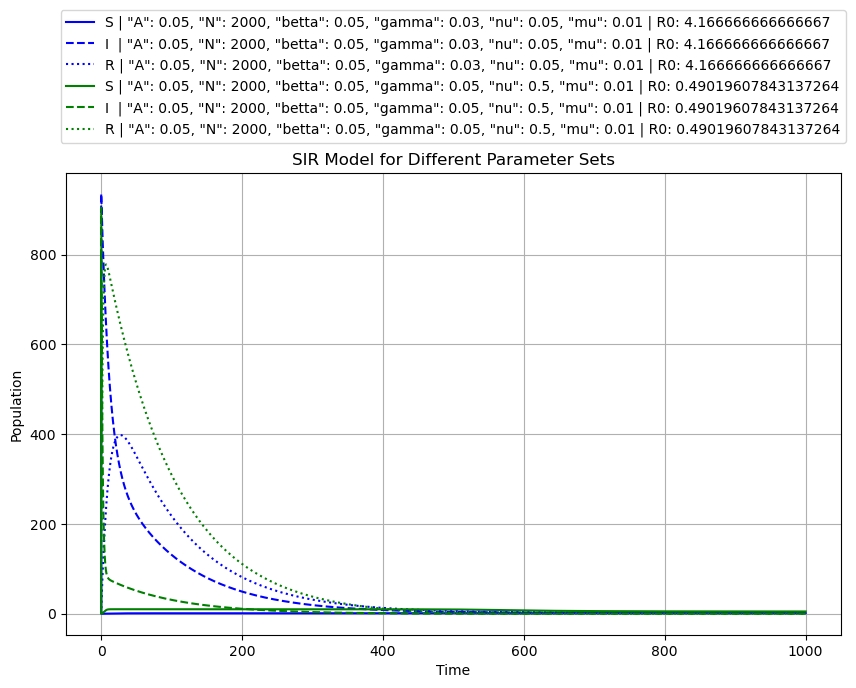

In [36]:
plot_SIR(800, t, params, labels, colors)